# 현정+경민

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
126991,a7277fa0d4bd4db0,"""\nI have clarified the lead (with references)...",0,0,0,0,0,0
54268,90fa2cd0f6dbdddc,"""\n\n Golden Foot Award \n\nThanks for reverti...",0,0,0,0,0,0
44677,7760aeeb26e33a18,Cool. Do I give a fuck? Enjoy the rest of yo...,1,0,1,0,1,0
52395,8c361793b28cf96c,"Yes, I was away & offline for virtually all of...",0,0,0,0,0,0
146697,30311d4eca891047,"Thanks. Farmbrough, .",0,0,0,0,0,0


In [3]:
cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [5]:
no_comment = train_df[train_df['comment_text'].isnull()]
len(no_comment)

0

In [7]:
no_comment = test_df[test_df['comment_text'].isnull()]
len(no_comment)

0

In [8]:
print('Total rows in test is {}'.format(len(test_df)))
print('Total rows in train is {}'.format(len(train_df)))
print(train_df[cols_target].sum())

Total rows in test is 153164
Total rows in train is 159571
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


In [9]:
train_df['char_length'] = train_df['comment_text'].apply(lambda x: len(str(x)))

In [13]:
test_df['char_length'] = test_df['comment_text'].apply(lambda x: len(str(x)))

## 텍스트 정제

re.sub('패턴', '바꿀문자열', '문자열', 바꿀횟수)
- 문자열 앞에 r이 붙으면 해당 문자열이 구성된 그대로 문자열로 반환
- \W : non alpha-numeric 문자 [^0-9a-zA-Z]와 동일
- \s : 공백 문자(띄어쓰기, 탭, 엔터 등)
- '+' : 1번 이상의 패턴이 발생

In [15]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [16]:
train_df['comment_text'] = train_df['comment_text'].map(lambda com : clean_text(com))

In [17]:
test_df['comment_text'] = test_df['comment_text'].map(lambda com : clean_text(com))

In [18]:
train_df = train_df.drop('char_length',axis=1)

In [19]:
X = train_df.comment_text
test_X = test_df.comment_text

In [20]:
print(X.shape, test_X.shape)

(159571,) (153164,)


## 인코딩: tf-idf - 현정

### 전체 train문서 fit

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=5000,stop_words='english')
X_dtm = vect.fit_transform(X)

In [132]:
sorted(vect.vocabulary_.items())

[('00', 0),
 ('000', 1),
 ('000000', 2),
 ('01', 3),
 ('02', 4),
 ('03', 5),
 ('04', 6),
 ('05', 7),
 ('06', 8),
 ('07', 9),
 ('08', 10),
 ('09', 11),
 ('10', 12),
 ('100', 13),
 ('1000', 14),
 ('101', 15),
 ('102', 16),
 ('103', 17),
 ('104', 18),
 ('105', 19),
 ('106', 20),
 ('107', 21),
 ('108', 22),
 ('109', 23),
 ('11', 24),
 ('110', 25),
 ('111', 26),
 ('112', 27),
 ('114', 28),
 ('115', 29),
 ('117', 30),
 ('118', 31),
 ('119', 32),
 ('12', 33),
 ('120', 34),
 ('121', 35),
 ('122', 36),
 ('123', 37),
 ('124', 38),
 ('125', 39),
 ('127', 40),
 ('128', 41),
 ('129', 42),
 ('13', 43),
 ('130', 44),
 ('131', 45),
 ('132', 46),
 ('133', 47),
 ('134', 48),
 ('135', 49),
 ('137', 50),
 ('138', 51),
 ('139', 52),
 ('14', 53),
 ('140', 54),
 ('141', 55),
 ('142', 56),
 ('144', 57),
 ('145', 58),
 ('146', 59),
 ('147', 60),
 ('149', 61),
 ('15', 62),
 ('150', 63),
 ('153', 64),
 ('154', 65),
 ('155', 66),
 ('156', 67),
 ('157', 68),
 ('159', 69),
 ('16', 70),
 ('160', 71),
 ('161', 72),
 

In [44]:
terms = vect.get_feature_names()
sums = X_dtm.sum(axis=0) # 특정 단어의 tf-idf score를 모든 문서에 대해 sum

data = []
for col, term in enumerate(terms):
    data.append((term, sums[0,col]))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False).head(20)

,term,rank
568,article,4157.066943
4438,talk,3948.522832
3245,page,3792.733441
4897,wikipedia,3461.865783
2585,just,2604.381619
2720,like,2454.059289
1487,did,2248.685123
4502,thanks,2187.126269
2617,know,2022.813623
4513,think,2019.980460


In [45]:
test_X_dtm = vect.transform(test_X)
test_X_dtm

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2618972 stored elements in Compressed Sparse Row format>

In [46]:
terms = vect.get_feature_names()
sums = test_X_dtm.sum(axis=0)

data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False).head(20)

,term,rank
568,article,3633.356570
3245,page,2704.939520
4897,wikipedia,2583.191475
2585,just,2354.864411
2720,like,2339.406234
2028,fuck,1972.939203
4513,think,1922.165260
4502,thanks,1830.866808
1487,did,1803.120378
4438,talk,1740.110783


### 각 label별 문서 fit

In [68]:
X_toxic = train_df[train_df['toxic']==1].comment_text
X_severe_toxic = train_df[train_df['severe_toxic']==1].comment_text
X_obscene = train_df[train_df['obscene']==1].comment_text
X_threat = train_df[train_df['threat']==1].comment_text
X_insult = train_df[train_df['insult']==1].comment_text
X_identity_hate = train_df[train_df['identity_hate']==1].comment_text

In [118]:
def label_token_tfidf(label_data, label, n_token=10):
    
    tfidf = TfidfVectorizer(max_features=500, stop_words='english')
    X_dtm = tfidf.fit_transform(label_data)

    terms = tfidf.get_feature_names()
    sums = X_dtm.sum(axis=0) # 특정 단어의 tf-idf score를 모든 문서에 대해 sum

    data = []
    for col, term in enumerate(terms):
        data.append((term, int(sums[0,col])))
    
    ranking = pd.DataFrame(data, columns=[label,'<=rank'])
    top_df = ranking.sort_values('<=rank', ascending=False).head(n_token)
    top_df.reset_index(inplace=True, drop=True)
    
    return top_df

In [119]:
toxic_term = label_token_tfidf(X_toxic, 'toxic')
severe_toxic_term = label_token_tfidf(X_severe_toxic, 'sever_toxic')
obscene_term = label_token_tfidf(X_obscene, 'obscene')
threat_term = label_token_tfidf(X_threat, 'threat')
insult_term = label_token_tfidf(X_insult, 'insult')
identity_hate_term = label_token_tfidf(X_identity_hate, 'identity_hate')

In [120]:
pd.concat([toxic_term,severe_toxic_term,obscene_term,threat_term,insult_term,identity_hate_term], axis=1)

,toxic,<=rank,sever_toxic,<=rank,obscene,<=rank,threat,<=rank,insult,<=rank,identity_hate,<=rank
0,fuck,851,fuck,215,fuck,737,die,33,fuck,589,gay,94
1,fucking,506,fucking,105,fucking,430,kill,30,fucking,347,fuck,81
2,like,481,bitch,70,shit,302,fucking,22,like,244,faggot,61
3,wikipedia,463,shit,67,bitch,249,fuck,21,bitch,230,fucking,60
4,just,418,suck,66,ass,246,going,20,shit,229,nigger,57
5,page,386,ass,55,like,244,hope,14,wikipedia,225,like,43
6,shit,380,asshole,51,suck,238,ass,14,suck,202,shit,41
7,stop,334,dick,50,wikipedia,233,shit,12,ass,201,ass,35
8,know,313,cunt,46,just,214,death,11,stupid,196,bitch,33
9,people,311,faggot,42,page,202,like,10,just,195,people,27


 Wikipedia’s talk page edits에서 데이터 가져옴

## 인코딩: Count - 현정

In [112]:
from sklearn.feature_extraction.text import CountVectorizer

In [113]:
def label_token_freq(label_data, label, n_token=10):
    
    count = CountVectorizer(max_features=500, stop_words='english')
    X_dtm = count.fit_transform(label_data)

    terms = count.get_feature_names()
    sums = X_dtm.sum(axis=0) # 특정 단어의 freq를 모든 문서에 대해 sum

    data = []
    for col, term in enumerate(terms):
        data.append((term, sums[0,col]))
    
    ranking = pd.DataFrame(data, columns=[label,'<=rank'])
    top_df = ranking.sort_values('<=rank', ascending=False).head(n_token)
    top_df.reset_index(inplace=True, drop=True)
    
    return top_df

In [116]:
toxic_term = label_token_freq(X_toxic, 'toxic')
severe_toxic_term = label_token_freq(X_severe_toxic, 'sever_toxic')
obscene_term = label_token_freq(X_obscene, 'obscene')
threat_term = label_token_freq(X_threat, 'threat')
insult_term = label_token_freq(X_insult, 'insult')
identity_hate_term = label_token_freq(X_identity_hate, 'identity_hate')

In [117]:
pd.concat([toxic_term,severe_toxic_term,obscene_term,threat_term,insult_term,identity_hate_term], axis=1)

,toxic,<=rank,sever_toxic,<=rank,obscene,<=rank,threat,<=rank,insult,<=rank,identity_hate,<=rank
0,fuck,9934,fuck,7303,fuck,9860,die,1168,fuck,7925,nigger,2969
1,wikipedia,3678,suck,2535,shit,3212,ass,772,fucking,2799,fat,1322
2,shit,3621,ass,2114,fucking,3192,kill,504,suck,2792,jew,1314
3,like,3512,shit,1884,suck,3021,going,294,nigger,2781,gay,918
4,nigger,3300,faggot,1571,ass,2846,wikipedia,200,ass,2211,fuck,880
5,fucking,3289,fucking,1456,nigger,2727,block,170,fat,1926,die,879
6,suck,3235,die,1156,wikipedia,1905,fuck,166,faggot,1867,faggot,742
7,ass,2939,bitch,1113,bitch,1795,jim,158,bitch,1733,fucking,518
8,hate,2631,nigger,1012,like,1541,wales,157,shit,1689,huge,430
9,just,2481,sucks,961,cunt,1530,supertr0ll,151,like,1565,suck,427


In [122]:
X_threat[X_threat.str.contains('jim')].values

array(['hey you fascist swine you are gonna get raped in the ass nice job being jimbo bitch you pathetic piece of shit',
       'jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must die jim wales must d

## 모델링 - 경민

GloVe : Global Vectors (for word representation) : 전역행렬 분해와 local(국소, 국지) 문맥 window 이용

전역 행렬 분해 (Global matrix factorization) :  거대한 단어-빈도 행렬에서 계수를 reduction 하기 위해 선영대수의 행렬 분해법을 이용하는 수법. 

단어-문서빈도를 표현하면 행은 단어를 열은 문서를 나타냄.

단어-단어 빈도를 나타낼 때에는 행, 열 둘다 단어를 나타내며 공기(co-occurrence) 정도를 측정한다.

In [41]:
import zipfile
import numpy as np
import pandas as pd
import string
import re
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import lightgbm as lgb 
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

In [42]:
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs

glove에 필요한 txt 파일 불러오기

In [1]:
def get_sentence_vectors(text):
    sentence_vector = np.zeros((100,))
    if len(text)==0:
        return sentence_vector
    for word_token in text:
        if word_token in word_embeddings:
            sentence_vector += word_embeddings[word_token]
    sentence_vector = sentence_vector/len(text)
    return sentence_vector

문장에 있는 단어별로 벡터위치를 구하는 함수를 정의한다

In [44]:
train_df.drop(["id"], axis=1, inplace=True)

In [45]:
test_df.drop(["id"], axis=1, inplace=True)

train, test 셋에 있는 id 행 삭제

In [46]:
train_df["comment_text"] = train_df["comment_text"].apply(get_sentence_vectors)
train_df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"[-0.3170687347848081, 0.263141253102345, 0.051...",0,0,0,0,0,0
1,"[-0.23991806707480579, 0.3557835058354348, 0.0...",0,0,0,0,0,0
2,"[-0.24745495958874622, 0.2609656016554749, 0.0...",0,0,0,0,0,0
3,"[-0.3014051211687426, 0.2671460452272246, 0.08...",0,0,0,0,0,0
4,"[-0.2593082464376434, 0.18040482370091265, 0.0...",0,0,0,0,0,0


comment_text 변수에 있는 단어를 함수에 넣어 적용한다.

In [47]:
train_data = train_df["comment_text"]
test_data = test_df["comment_text"]
label=train_df[['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]

In [48]:
x_train, x_test, y_train, y_test =  train_test_split(train_data, label, test_size = 0.3, random_state=123)

In [49]:
label.columns.to_list()

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [50]:
accuracy_dict = {}
for category in label.columns.to_list():
    lgb_clf = lgb.LGBMClassifier()
    lgb_clf.fit(x_train.to_list(), y_train[category])
    y_pred = lgb_clf.predict(x_test.to_list())
    accuracy_dict[category] = accuracy_score(y_test[category], y_pred)*100

LGBM classifier 객체를 만들어 적용.

In [51]:
for category,score in accuracy_dict.items():
    print(f"{category}: {score}")

toxic: 92.00994318181817
severe_toxic: 98.8155915775401
obscene: 95.68850267379679
threat: 99.53417446524064
insult: 95.75116978609626
identity_hate: 98.9492814171123


# 지민: 전처리+모델링

In [20]:
data = pd.read_csv('train.csv')

In [21]:
cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [22]:
data['sum'] = data[cols_target].sum(axis =1)
print(data['sum'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: sum, dtype: int64


In [23]:
data['sum'] = data['sum'] > 0 
data['sum'] = data['sum'].astype(int)
print(data['sum'].value_counts())

0    143346
1     16225
Name: sum, dtype: int64


In [24]:
data['char_length'] = data['comment_text'].apply(lambda x: len(str(x)))

In [25]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [26]:
data['comment_text'] = data['comment_text'].map(lambda com : clean_text(com))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['comment_text'], data['sum'], test_size=0.2, random_state=42)

In [28]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(127656,) (31915,)
(127656,) (31915,)


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features = 5000, stop_words='english')

In [30]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<127656x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2549890 stored elements in Compressed Sparse Row format>

In [31]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<31915x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 628673 stored elements in Compressed Sparse Row format>

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression(C=1, max_iter = 2000)

In [33]:
logreg.fit(X_train_dtm, y_train)
y_pred_train = logreg.predict(X_train_dtm)
print('Train accuracy : {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = logreg.predict(X_test_dtm)
print('Test accuracy : {}'.format(accuracy_score(y_test, y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))

Train accuracy : 0.9581296609638403
Test accuracy : 0.9566034779884067
[[28502   169]
 [ 1216  2028]]


In [34]:
import sklearn.metrics as metrics

probs = logreg.predict_proba(X_test_dtm)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

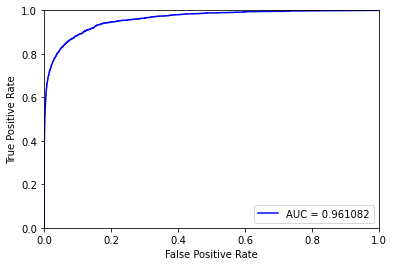

In [35]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %f' %roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
from sklearn.metrics import f1_score

print("F1 score :" , f1_score(y_test,y_pred_test))

F1 score : 0.7454512038228267
